In [462]:
import config
from bs4 import BeautifulSoup as BS
import requests
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import *
import time
import re
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score


In [797]:
df_scaled2 = pd.read_csv('df_scaled2.csv', index_col='Team')

In [873]:
df_scaled2.head()

,ppda_coef,deep,CR,P,DR,IBS,OBS,TBOX,FKCR,CRN,...,TKL,FC,AW,BR,DW,AKS,CL,PUNCH,LMT,poss
Team,,,,,,,,,,,,,,,,,,,,,
Bayern Munich,-0.898850,2.973806,1.611378,2.370940,2.120765,3.188202,0.987291,3.397046,0.739975,3.731464,...,-2.081226,-1.795271,-0.716088,1.360479,-0.948188,0.407311,-3.083852,-1.680898,-0.596272,2.474804
Borussia Dortmund,1.390868,0.807589,-1.716195,1.854117,2.366656,0.630185,-0.790167,0.960062,0.388823,-0.090346,...,-1.469764,-2.115407,-1.202503,-0.403610,-0.713429,-1.157638,-0.662533,0.096810,-0.596272,1.379674
RasenBallsport Leipzig,-0.117029,0.509248,-0.068055,-0.233706,0.317571,1.470131,-0.663206,0.857572,0.827763,0.616207,...,1.420784,0.653768,1.188352,1.945090,1.814138,1.581023,-0.321502,-1.147586,0.708380,-0.100780
Bayer Leverkusen,-0.271538,1.067016,0.203158,1.991632,0.710995,1.412862,0.701628,1.227675,-0.664633,0.616207,...,0.401681,-0.866877,-0.386314,2.796366,0.084750,1.189786,-0.543172,-0.614273,-1.248599,1.562196
Borussia M.Gladbach,2.184874,0.405477,-0.600050,0.882059,-0.272566,0.343840,0.066822,0.174306,-0.576845,0.584091,...,-1.414177,-1.475135,-1.433344,-1.101041,-2.419341,-1.157638,-1.003564,-1.503127,0.056054,0.467065


In [874]:
df_scaled2.columns

Index(['ppda_coef', 'deep', 'CR', 'P', 'DR', 'IBS', 'OBS', 'TBOX', 'FKCR',
       'CRN', 'CRNCR', 'FKS', 'TOFF', 'BCS', 'oppda_coef', 'deep_allowed',
       'INT', 'BLK', 'TKL', 'FC', 'AW', 'BR', 'DW', 'AKS', 'CL', 'PUNCH',
       'LMT', 'poss'],
      dtype='object')

In [801]:
df_stats_poss3 = pd.read_csv('df_stats_poss3.csv', index_col='Team')

In [802]:
df_stats_poss3.head()

,CR,CCOP,CCSP,P,DR,IBS,OBS,CRN,INT,BLK,TKL,FC,AW,BR,DW,AKS,CL,LMT,poss
Team,,,,,,,,,,,,,,,,,,,
Bayern Munich,22.852941,10.000000,2.088235,571.000000,12.500000,12.794118,6.000000,8.441176,9.882353,1.794118,13.647059,9.176471,15.705882,64.029412,51.558824,0.323529,10.117647,0.029412,0.622
Borussia Dortmund,13.470588,6.882353,1.235294,524.352941,12.941176,8.852941,4.352941,4.941176,11.323529,2.323529,14.617647,8.588235,13.970588,58.970588,52.441176,0.088235,18.470588,0.029412,0.568
RasenBallsport Leipzig,18.117647,8.470588,1.558824,335.911765,9.264706,10.147059,4.470588,5.588235,12.352941,2.058824,19.205882,13.676471,22.500000,65.705882,61.941176,0.500000,19.647059,0.088235,0.495
Bayer Leverkusen,18.882353,8.970588,1.000000,536.764706,9.970588,10.058824,5.735294,5.588235,10.705882,2.911765,17.588235,10.882353,16.882353,68.147059,55.441176,0.441176,18.882353,0.000000,0.577
Borussia M.Gladbach,16.617647,7.588235,1.352941,436.617647,8.205882,8.411765,5.147059,5.558824,9.117647,3.000000,14.705882,9.764706,13.147059,56.970588,46.029412,0.088235,17.294118,0.058824,0.523


In [803]:
df_leagues = pd.read_csv('df_stats_leagues.csv', index_col=0)

In [872]:
df_scaled2.columns

Index(['ppda_coef', 'deep', 'CR', 'P', 'DR', 'IBS', 'OBS', 'TBOX', 'FKCR',
       'CRN', 'CRNCR', 'FKS', 'TOFF', 'BCS', 'oppda_coef', 'deep_allowed',
       'INT', 'BLK', 'TKL', 'FC', 'AW', 'BR', 'DW', 'AKS', 'CL', 'PUNCH',
       'LMT', 'poss'],
      dtype='object')

In [804]:
df_scaled3 = df_scaled2.reset_index()

In [805]:
df_scaled3.head()

,Team,ppda_coef,deep,CR,P,DR,IBS,OBS,TBOX,FKCR,...,TKL,FC,AW,BR,DW,AKS,CL,PUNCH,LMT,poss
0,Bayern Munich,-0.898850,2.973806,1.611378,2.370940,2.120765,3.188202,0.987291,3.397046,0.739975,...,-2.081226,-1.795271,-0.716088,1.360479,-0.948188,0.407311,-3.083852,-1.680898,-0.596272,2.474804
1,Borussia Dortmund,1.390868,0.807589,-1.716195,1.854117,2.366656,0.630185,-0.790167,0.960062,0.388823,...,-1.469764,-2.115407,-1.202503,-0.403610,-0.713429,-1.157638,-0.662533,0.096810,-0.596272,1.379674
2,RasenBallsport Leipzig,-0.117029,0.509248,-0.068055,-0.233706,0.317571,1.470131,-0.663206,0.857572,0.827763,...,1.420784,0.653768,1.188352,1.945090,1.814138,1.581023,-0.321502,-1.147586,0.708380,-0.100780
3,Bayer Leverkusen,-0.271538,1.067016,0.203158,1.991632,0.710995,1.412862,0.701628,1.227675,-0.664633,...,0.401681,-0.866877,-0.386314,2.796366,0.084750,1.189786,-0.543172,-0.614273,-1.248599,1.562196
4,Borussia M.Gladbach,2.184874,0.405477,-0.600050,0.882059,-0.272566,0.343840,0.066822,0.174306,-0.576845,...,-1.414177,-1.475135,-1.433344,-1.101041,-2.419341,-1.157638,-1.003564,-1.503127,0.056054,0.467065


In [806]:
df1.Home.unique()

array(['Manchester United', 'Newcastle United', 'Huddersfield', 'Fulham',
       'Watford', 'Bournemouth', 'Wolverhampton Wanderers', 'Southampton',
       'Liverpool', 'Arsenal', 'Cardiff', 'West Ham', 'Everton',
       'Leicester', 'Tottenham', 'Chelsea', 'Burnley', 'Manchester City',
       'Brighton', 'Crystal Palace', 'Marseille', 'Nantes', 'Montpellier',
       'Angers', 'Saint-Etienne', 'Nice', 'Lille', 'Lyon', 'Bordeaux',
       'Paris Saint Germain', 'Reims', 'Guingamp', 'Dijon', 'Rennes',
       'Caen', 'Amiens', 'Monaco', 'Strasbourg', 'Toulouse', 'Nimes',
       'Bayern Munich', 'Werder Bremen', 'Freiburg', 'Wolfsburg',
       'Hertha Berlin', 'Fortuna Duesseldorf', 'Borussia M.Gladbach',
       'Mainz 05', 'Borussia Dortmund', 'Hannover 96', 'Augsburg',
       'Hoffenheim', 'Bayer Leverkusen', 'Eintracht Frankfurt',
       'Nuernberg', 'VfB Stuttgart', 'RasenBallsport Leipzig',
       'Schalke 04', 'Chievo', 'Lazio', 'Torino', 'Empoli', 'Bologna',
       'Parma Calcio 1913

In [28]:
team_dict = {'Manchester Utd': 'Manchester United', 'Newcastle Utd': 'Newcastle United', 'Wolves': 
             'Wolverhampton Wanderers', 'Cardiff City': 'Cardiff', 'Leicester City': 'Leicester', 'Saint-Étienne': 
             'Saint-Etienne', 'Paris S-G': 'Paris Saint Germain', 'Nîmes': 'Nimes', 'Hertha BSC': 'Hertha Berlin', 
             'Düsseldorf': 'Fortuna Duesseldorf', "M'gladbach": 'Borussia M.Gladbach', 'Dortmund':
             'Borussia Dortmund', 'Bayer': 'Bayer Leverkusen', 'Eint Frankfurt': 'Eintracht Frankfurt',
             'Nürnberg': 'Nuernberg', 'Stuttgart': 'VfB Stuttgart', 'RB Leipzig': 'RasenBallsport Leipzig',
             'Parma': 'Parma Calcio 1913', 'SPAL': 'SPAL 2013', 'Milan': 'AC Milan', 'Betis': 'Real Betis',
             'Athletic Bilbao': 'Athletic Club', 'Leganés': 'Leganes', 'Alavés': 'Alaves', 'Atlético Madrid':
             'Atletico Madrid', 'Valladolid': 'Real Valladolid', 'Huesca': 'SD Huesca'}

In [807]:
df1 = pd.read_csv('df_xg.csv', index_col=0)

In [808]:
df1.head()

,Wk,Day,Date,Home,xG,xG.1,Away,Attendance,Venue,Referee,league,home_goals,away_goals
0,1.0,Fri,8/10/18,Manchester Utd,1.6,1.1,Leicester City,74439.0,Old Trafford,Andre Marriner,epl,2,1
1,1.0,Sat,8/11/18,Newcastle Utd,0.9,1.9,Tottenham,51749.0,St. James' Park,Martin Atkinson,epl,1,2
2,1.0,Sat,8/11/18,Huddersfield,0.5,1.9,Chelsea,24121.0,The John Smith's Stadium,Chris Kavanagh,epl,0,3
3,1.0,Sat,8/11/18,Fulham,0.6,0.9,Crystal Palace,24821.0,Craven Cottage,Mike Dean,epl,0,2
4,1.0,Sat,8/11/18,Watford,1.6,0.3,Brighton,20051.0,Vicarage Road Stadium,Jonathan Moss,epl,2,0


In [46]:
# df2 = pd.read_csv('xg_df.csv', index_col=0)

In [43]:
# df2 = df2.set_index('index')

In [44]:
# df2.head()

,xg_home,xg_away,xg_total,xga_home,xga_away,xga_total,xg_dif
index,,,,,,,
Manchester United,31.4,28.1,59.5,20.3,28.0,48.3,11.2
Newcastle United,22.1,16.7,38.8,23.7,29.7,53.4,-14.6
Huddersfield,15.9,14.2,30.1,30.1,32.2,62.3,-32.2
Fulham,22.7,16.7,39.4,27.7,37.8,65.5,-26.1
Watford,23.1,24.8,47.9,27.5,27.6,55.1,-7.2


In [45]:
# df2['index'] = df2['index'].map(team_dict).fillna(df2['index'])

In [809]:
df1['Home'] = df1['Home'].map(team_dict).fillna(df1['Home'])

In [810]:
df1['Away'] = df1['Away'].map(team_dict).fillna(df1['Away'])

In [811]:
df1.head()

,Wk,Day,Date,Home,xG,xG.1,Away,Attendance,Venue,Referee,league,home_goals,away_goals
0,1.0,Fri,8/10/18,Manchester United,1.6,1.1,Leicester,74439.0,Old Trafford,Andre Marriner,epl,2,1
1,1.0,Sat,8/11/18,Newcastle United,0.9,1.9,Tottenham,51749.0,St. James' Park,Martin Atkinson,epl,1,2
2,1.0,Sat,8/11/18,Huddersfield,0.5,1.9,Chelsea,24121.0,The John Smith's Stadium,Chris Kavanagh,epl,0,3
3,1.0,Sat,8/11/18,Fulham,0.6,0.9,Crystal Palace,24821.0,Craven Cottage,Mike Dean,epl,0,2
4,1.0,Sat,8/11/18,Watford,1.6,0.3,Brighton,20051.0,Vicarage Road Stadium,Jonathan Moss,epl,2,0


In [812]:
cols_to_drop = ['Wk', 'Day', 'Date', 'Attendance', 'Venue', 'Referee', 'league']

In [813]:
df1 = df1.drop(columns=cols_to_drop)

In [814]:
df1.shape

(1824, 6)

In [815]:
df_merged1 = pd.merge(df1, df_scaled3, left_on='Home', right_on='Team')

In [864]:
df_merged2 = pd.merge(df_merged1, df_scaled3, left_on='Away', right_on='Team')

In [892]:
df_merged2.Away.value_counts()

Cagliari                  19
Huddersfield              19
Real Madrid               19
Sevilla                   19
Levante                   19
                          ..
Nuernberg                 17
Augsburg                  17
Hertha Berlin             17
RasenBallsport Leipzig    17
Eintracht Frankfurt       17
Name: Away, Length: 98, dtype: int64

In [884]:
df_merged2= df_merged2.drop(columns=['Team_x', 'Team_y'])

In [890]:
col_list1 = df_merged2.columns[62:91]

In [891]:
col_list1

Index(['xG_diff', 'ppda_diff', 'deep_diff', 'CR_diff', 'P_diff', 'DR_diff',
       'IBS_diff', 'OBS_diff', 'TBOX_diff', 'FKCR_diff', 'CRN_diff',
       'CRNCR_diff', 'FKS_diff', 'TOFF_diff', 'BCS_diff', 'oppda_diff',
       'deep_allowed_diff', 'INT_diff', 'BLK_diff', 'TKL_diff', 'FC_diff',
       'AW_diff', 'BR_diff', 'DW_diff', 'AKS_diff', 'CL_diff', 'PUNCH_diff',
       'LMT_diff', 'poss_diff'],
      dtype='object')

In [885]:
df_merged2.columns[6:62]

Index(['ppda_coef_x', 'deep_x', 'CR_x', 'P_x', 'DR_x', 'IBS_x', 'OBS_x',
       'TBOX_x', 'FKCR_x', 'CRN_x', 'CRNCR_x', 'FKS_x', 'TOFF_x', 'BCS_x',
       'oppda_coef_x', 'deep_allowed_x', 'INT_x', 'BLK_x', 'TKL_x', 'FC_x',
       'AW_x', 'BR_x', 'DW_x', 'AKS_x', 'CL_x', 'PUNCH_x', 'LMT_x', 'poss_x',
       'ppda_coef_y', 'deep_y', 'CR_y', 'P_y', 'DR_y', 'IBS_y', 'OBS_y',
       'TBOX_y', 'FKCR_y', 'CRN_y', 'CRNCR_y', 'FKS_y', 'TOFF_y', 'BCS_y',
       'oppda_coef_y', 'deep_allowed_y', 'INT_y', 'BLK_y', 'TKL_y', 'FC_y',
       'AW_y', 'BR_y', 'DW_y', 'AKS_y', 'CL_y', 'PUNCH_y', 'LMT_y', 'poss_y'],
      dtype='object')

In [886]:
col_list2 = df_merged2.columns[6:62]

In [887]:
col_list2 = col_list2.append(df_merged2.columns[1:3])

In [888]:
col_list2

Index(['ppda_coef_x', 'deep_x', 'CR_x', 'P_x', 'DR_x', 'IBS_x', 'OBS_x',
       'TBOX_x', 'FKCR_x', 'CRN_x', 'CRNCR_x', 'FKS_x', 'TOFF_x', 'BCS_x',
       'oppda_coef_x', 'deep_allowed_x', 'INT_x', 'BLK_x', 'TKL_x', 'FC_x',
       'AW_x', 'BR_x', 'DW_x', 'AKS_x', 'CL_x', 'PUNCH_x', 'LMT_x', 'poss_x',
       'ppda_coef_y', 'deep_y', 'CR_y', 'P_y', 'DR_y', 'IBS_y', 'OBS_y',
       'TBOX_y', 'FKCR_y', 'CRN_y', 'CRNCR_y', 'FKS_y', 'TOFF_y', 'BCS_y',
       'oppda_coef_y', 'deep_allowed_y', 'INT_y', 'BLK_y', 'TKL_y', 'FC_y',
       'AW_y', 'BR_y', 'DW_y', 'AKS_y', 'CL_y', 'PUNCH_y', 'LMT_y', 'poss_y',
       'xG', 'xG.1'],
      dtype='object')

In [879]:
df_merged2.columns

Index(['Home', 'xG', 'xG.1', 'Away', 'home_goals', 'away_goals', 'Team_x',
       'ppda_coef_x', 'deep_x', 'CR_x', 'P_x', 'DR_x', 'IBS_x', 'OBS_x',
       'TBOX_x', 'FKCR_x', 'CRN_x', 'CRNCR_x', 'FKS_x', 'TOFF_x', 'BCS_x',
       'oppda_coef_x', 'deep_allowed_x', 'INT_x', 'BLK_x', 'TKL_x', 'FC_x',
       'AW_x', 'BR_x', 'DW_x', 'AKS_x', 'CL_x', 'PUNCH_x', 'LMT_x', 'poss_x',
       'Team_y', 'ppda_coef_y', 'deep_y', 'CR_y', 'P_y', 'DR_y', 'IBS_y',
       'OBS_y', 'TBOX_y', 'FKCR_y', 'CRN_y', 'CRNCR_y', 'FKS_y', 'TOFF_y',
       'BCS_y', 'oppda_coef_y', 'deep_allowed_y', 'INT_y', 'BLK_y', 'TKL_y',
       'FC_y', 'AW_y', 'BR_y', 'DW_y', 'AKS_y', 'CL_y', 'PUNCH_y', 'LMT_y',
       'poss_y', 'xG_diff', 'ppda_diff', 'deep_diff'],
      dtype='object')

In [889]:
df_merged2['xG_diff'] = df_merged2['xG'] - df_merged2['xG.1']
df_merged2['ppda_diff'] = df_merged2['ppda_coef_x'] - df_merged2['ppda_coef_y']
df_merged2['deep_diff'] = df_merged2['deep_x'] - df_merged2['deep_y']
df_merged2['CR_diff'] = df_merged2['CR_x'] - df_merged2['CR_y']
df_merged2['P_diff'] = df_merged2['P_x'] - df_merged2['P_y']
df_merged2['DR_diff'] = df_merged2['DR_x'] - df_merged2['DR_y']
df_merged2['IBS_diff'] = df_merged2['IBS_x'] - df_merged2['IBS_y']
df_merged2['OBS_diff'] = df_merged2['OBS_x'] - df_merged2['OBS_y']
df_merged2['TBOX_diff'] = df_merged2['TBOX_x'] - df_merged2['TBOX_y']
df_merged2['FKCR_diff'] = df_merged2['FKCR_x'] - df_merged2['FKCR_y']
df_merged2['CRN_diff'] = df_merged2['CRN_x'] - df_merged2['CRN_y']
df_merged2['CRNCR_diff'] = df_merged2['CRNCR_x'] - df_merged2['CRNCR_y']
df_merged2['FKS_diff'] = df_merged2['FKS_x'] - df_merged2['FKS_y']
df_merged2['TOFF_diff'] = df_merged2['TOFF_x'] - df_merged2['TOFF_y']
df_merged2['BCS_diff'] = df_merged2['BCS_x'] - df_merged2['BCS_y']
df_merged2['oppda_diff'] = df_merged2['oppda_coef_x'] - df_merged2['oppda_coef_y']
df_merged2['deep_allowed_diff'] = df_merged2['deep_allowed_x'] - df_merged2['deep_allowed_y']
df_merged2['INT_diff'] = df_merged2['INT_x'] - df_merged2['INT_y']
df_merged2['BLK_diff'] = df_merged2['BLK_x'] - df_merged2['BLK_y']
df_merged2['TKL_diff'] = df_merged2['TKL_x'] - df_merged2['TKL_y']
df_merged2['FC_diff'] = df_merged2['FC_x'] - df_merged2['FC_y']
df_merged2['AW_diff'] = df_merged2['AW_x'] - df_merged2['AW_y']
df_merged2['BR_diff'] = df_merged2['BR_x'] - df_merged2['BR_y']
df_merged2['DW_diff'] = df_merged2['DW_x'] - df_merged2['DW_y']
df_merged2['AKS_diff'] = df_merged2['AKS_x'] - df_merged2['AKS_y']
df_merged2['CL_diff'] = df_merged2['CL_x'] - df_merged2['CL_y']
df_merged2['PUNCH_diff'] = df_merged2['PUNCH_x'] - df_merged2['PUNCH_y']
df_merged2['LMT_diff'] = df_merged2['LMT_x'] - df_merged2['LMT_y']
df_merged2['poss_diff'] = df_merged2['poss_x'] - df_merged2['poss_y']

In [893]:
df_merged2['score'] = df_merged2['home_goals'] - df_merged2['away_goals']
results = df_merged2.drop(['home_goals', 'away_goals', 'Home', 'Away'], 1)
results['winner'] = None
results['winner'][results.score > 0] = 1
results['winner'][results.score < 0] = 2
results['winner'][results.score == 0] = 0
#results = results[results.winner != 0]

In [894]:
results.head(20)

,xG,xG.1,ppda_coef_x,deep_x,CR_x,P_x,DR_x,IBS_x,OBS_x,TBOX_x,...,AW_diff,BR_diff,DW_diff,AKS_diff,CL_diff,PUNCH_diff,LMT_diff,poss_diff,score,winner
0,1.6,1.1,-0.409202,0.963928,-0.539109,0.650128,-0.152640,0.196146,0.618101,0.757480,...,-0.892557,-0.945202,-1.848415,-0.350054,-1.235788,-0.477174,-1.167321,0.507005,1,1
1,0.3,1.4,0.853560,-0.602876,0.142217,-1.089636,-1.428681,-0.521224,-0.432671,-0.663895,...,-0.103271,0.036707,-1.288289,1.225191,1.334956,0.000000,-0.583660,-1.602135,-2,2
2,1.7,3.0,0.197249,-1.125143,0.683545,-0.439448,-1.487350,-1.153193,-0.659865,-0.969566,...,0.309813,0.321185,-0.700157,0.175027,-2.196956,0.954348,-1.750981,-0.750367,-3,2
3,1.7,1.8,1.492186,-0.684117,-0.791106,0.188290,0.331375,-0.896989,0.419306,-0.867676,...,-0.501602,0.229418,-1.519341,1.575245,0.190708,2.226813,-2.334641,-0.324483,0,0
4,0.8,1.0,0.083612,0.522902,-1.173769,-0.523710,-0.621989,-0.265021,-1.114253,0.487470,...,-0.331943,0.119297,-1.169262,4.025627,0.083912,-0.795290,1.750981,-0.689527,1,1
5,1.7,2.1,1.737714,0.580932,-0.781773,-0.322822,-0.592654,-0.094218,-1.142652,0.411052,...,-0.752403,-1.238857,-2.058462,0.875136,0.602637,-1.113406,0.583660,-0.628686,2,1
6,1.5,1.3,1.248633,-0.533240,-0.688441,-0.167710,-0.035303,-0.025897,-0.375872,-0.322561,...,0.022130,1.385685,-0.511115,-1.050163,-0.923027,-1.113406,-1.167321,-0.689527,1,1
7,0.6,0.6,-0.074104,-0.277909,-0.277779,-0.872129,-0.680657,-0.418743,0.476105,-0.332750,...,-0.309813,-0.100944,-1.106248,0.700109,0.930655,0.795290,0.000000,-1.095130,-1,2
8,0.5,0.8,-0.448657,2.333430,0.235549,1.865368,0.316708,1.391763,0.106915,2.153381,...,-1.563819,0.532250,-2.443548,1.925300,-2.341894,0.318116,-1.167321,1.622415,0,0
9,2.9,0.7,-0.753123,1.973646,-0.847106,1.097679,-0.431316,0.281547,-1.085853,1.180326,...,-1.866255,-0.192711,-2.303517,1.400218,-1.388354,0.477174,-1.167321,1.074850,2,1


In [895]:
y = results['winner'].astype(int)
X = results[col_list1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

In [896]:
# Instantiate XGBClassifier
xgb = XGBClassifier(colsample_bytree= 0.5, gamma= 0.0, learning_rate= 0.05, max_depth= 2, min_child_weight= 2)

# colsample_bytree: 0.5
# gamma: 0.0
# learning_rate: 0.05
# max_depth: 2
# min_child_weight: 2

# Training Accuracy: 62.57%
# Validation accuracy: 56.8%


In [897]:
# Fit XGBClassifier
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [898]:
# Predict on training and test sets
training_preds1 = xgb.predict(X_train)
test_preds1 = xgb.predict(X_test)

In [899]:
# Accuracy of training and test sets
training_accuracy1 = accuracy_score(y_train, training_preds1)
test_accuracy1 = accuracy_score(y_test, test_preds1)

In [900]:
print('Training Accuracy: {:.4}%'.format(training_accuracy1 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy1 * 100))

Training Accuracy: 62.87%
Validation accuracy: 56.14%


In [450]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [452]:
param_grid = {
    "learning_rate": [0.05, 0.10, 0.15], 
    "max_depth": [2, 3, 4], 
    "min_child_weight" : [1, 2, 3], 
    "gamma" : [0.0, 0.1, 0.2],
    "colsample_bytree": [0.5, 1, 1.5]
}

In [453]:
grid_xgb = GridSearchCV(xgb, param_grid, scoring='accuracy', cv=None, n_jobs=1, verbose=1215)
grid_xgb.fit(X_train, y_train)

best_parameters = grid_xgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_xgb.predict(X_train)
test_preds = grid_xgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1, score=0.518, total=   1.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1, score=0.609, total=   0.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1, score=0.562, total=   0.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.1s rema

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3, score=0.579, total=   0.8s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   27.3s remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3, score=0.568, total=   1.2s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   28.6s remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1, score=0.522, total=   1.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:   29.6s remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1, score=0.584, total=   1.2s
[Parallel(n

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=3, score=0.536, total=   0.7s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed:   53.2s remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=3, score=0.579, total=   0.7s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed:   53.8s remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=3, score=0.557, total=   0.7s
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   54.5s remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1, score=0.507, total=   0.8s
[Parallel(n_jobs=1

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3, score=0.588, total=   1.0s
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:  1.3min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3, score=0.547, total=   1.0s
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed:  1.3min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3, score=0.568, total=   0.9s
[Parallel(n_jobs=1)]: Done  89 out of  89 | elapsed:  1.4min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3, score=0.546, total=   1.0s
[Parallel(n_jobs=1

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3, score=0.504, total=   0.9s
[Parallel(n_jobs=1)]: Done 116 out of 116 | elapsed:  1.7min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3, score=0.577, total=   0.8s
[Parallel(n_jobs=1)]: Done 117 out of 117 | elapsed:  1.7min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3, score=0.547, total=   0.8s
[Parallel(n_jobs=1)]: Done 118 out of 118 | elapsed:  1.7min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3, score=0.560, total=   0.8s
[Parallel(n

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=2, score=0.597, total=   0.7s
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:  2.1min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3, score=0.529, total=   0.7s
[Parallel(n_jobs=1)]: Done 146 out of 146 | elapsed:  2.2min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3, score=0.606, total=   0.6s
[Parallel(n_jobs=1)]: Done 147 out of 147 | elapsed:  2.2min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3, score=0.555, total=   0.7s
[Parallel(n

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, score=0.575, total=   1.1s
[Parallel(n_jobs=1)]: Done 174 out of 174 | elapsed:  2.6min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, score=0.538, total=   1.1s
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:  2.6min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, score=0.526, total=   1.1s
[Parallel(n_jobs=1)]: Done 176 out of 176 | elapsed:  2.6min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, score=0.606, total=   1.1s
[Parallel(n

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, score=0.547, total=   0.9s
[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:  3.0min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, score=0.564, total=   0.8s
[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:  3.0min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, score=0.571, total=   0.9s
[Parallel(n_jobs=1)]: Done 205 out of 205 | elapsed:  3.0min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, score=0.529, total=   0.9s
[Parallel(n_jobs=1

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2, score=0.599, total=   0.7s
[Parallel(n_jobs=1)]: Done 232 out of 232 | elapsed:  3.4min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2, score=0.566, total=   0.6s
[Parallel(n_jobs=1)]: Done 233 out of 233 | elapsed:  3.5min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2, score=0.549, total=   0.7s
[Parallel(n_jobs=1)]: Done 234 out of 234 | elapsed:  3.5min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2, score=0.579, total=   0.7s
[Parallel(n

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=0.533, total=   1.2s
[Parallel(n_jobs=1)]: Done 261 out of 261 | elapsed:  3.9min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=0.562, total=   1.1s
[Parallel(n_jobs=1)]: Done 262 out of 262 | elapsed:  3.9min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=0.544, total=   1.0s
[Parallel(n_jobs=1)]: Done 263 out of 263 | elapsed:  3.9min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=0.582, total=   0.9s
[Parallel(n

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, score=0.575, total=   0.8s
[Parallel(n_jobs=1)]: Done 290 out of 290 | elapsed:  4.3min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, score=0.547, total=   0.8s
[Parallel(n_jobs=1)]: Done 291 out of 291 | elapsed:  4.3min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, score=0.588, total=   1.1s
[Parallel(n_jobs=1)]: Done 292 out of 292 | elapsed:  4.3min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, score=0.566, total=   0.8s
[Parallel(n

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=1, score=0.571, total=   0.6s
[Parallel(n_jobs=1)]: Done 319 out of 319 | elapsed:  4.7min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=1, score=0.564, total=   0.6s
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  4.7min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2, score=0.536, total=   0.6s
[Parallel(n_jobs=1)]: Done 321 out of 321 | elapsed:  4.7min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2, score=0.602, total=   0.6s
[Parallel(n_jobs=1

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, score=0.536, total=   2.1s
[Parallel(n_jobs=1)]: Done 348 out of 348 | elapsed:  5.2min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, score=0.557, total=   1.3s
[Parallel(n_jobs=1)]: Done 349 out of 349 | elapsed:  5.2min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, score=0.557, total=   1.0s
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:  5.2min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, score=0.518, total=   1.0s
[Parallel(n_jobs=1

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, score=0.555, total=   0.9s
[Parallel(n_jobs=1)]: Done 377 out of 377 | elapsed:  5.6min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, score=0.533, total=   0.9s
[Parallel(n_jobs=1)]: Done 378 out of 378 | elapsed:  5.6min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, score=0.575, total=   0.8s
[Parallel(n_jobs=1)]: Done 379 out of 379 | elapsed:  5.7min remaining:    0.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, score=0.568, total=   0.8s
[Parallel(n

[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1, score=0.533, total=   0.8s
[Parallel(n_jobs=1)]: Done 406 out of 406 | elapsed:  6.1min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1, score=0.580, total=   0.8s
[Parallel(n_jobs=1)]: Done 407 out of 407 | elapsed:  6.1min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1, score=0.533, total=   0.8s
[Parallel(n_jobs=1)]: Done 408 out of 408 | elapsed:  6.1min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=1, score=0.590, total=   0.9s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3, score=0.568, total=   1.3s
[Parallel(n_jobs=1)]: Done 435 out of 435 | elapsed:  6.6min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1, score=0.536, total=   1.8s
[Parallel(n_jobs=1)]: Done 436 out of 436 | elapsed:  6.6min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1, score=0.569, total=   1.5s
[Parallel(n_jobs=1)]: Done 437 out of 437 | elapsed:  6.7min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1, score=0.533, total=   1.5s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=3, score=0.586, total=   0.9s
[Parallel(n_jobs=1)]: Done 464 out of 464 | elapsed:  7.2min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=3, score=0.571, total=   0.9s
[Parallel(n_jobs=1)]: Done 465 out of 465 | elapsed:  7.3min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1, score=0.533, total=   1.2s
[Parallel(n_jobs=1)]: Done 466 out of 466 | elapsed:  7.3min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1, score=0.558, total=   1.3s
[Parallel(n_jobs=1)]: Done 467 o

[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3, score=0.522, total=   1.6s
[Parallel(n_jobs=1)]: Done 493 out of 493 | elapsed:  7.9min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3, score=0.564, total=   1.6s
[Parallel(n_jobs=1)]: Done 494 out of 494 | elapsed:  7.9min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3, score=0.516, total=   1.8s
[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:  8.0min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1, score=0.526, total=   1.1s
[Parallel(n_jobs=1)]: Done 496

[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3, score=0.551, total=   1.3s
[Parallel(n_jobs=1)]: Done 522 out of 522 | elapsed:  8.5min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3, score=0.566, total=   1.2s
[Parallel(n_jobs=1)]: Done 523 out of 523 | elapsed:  8.5min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3, score=0.586, total=   1.2s
[Parallel(n_jobs=1)]: Done 524 out of 524 | elapsed:  8.5min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3, score=0.538, total=   1.3s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3, score=0.544, total=   0.9s
[Parallel(n_jobs=1)]: Done 551 out of 551 | elapsed:  9.2min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3, score=0.580, total=   0.9s
[Parallel(n_jobs=1)]: Done 552 out of 552 | elapsed:  9.2min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3, score=0.540, total=   0.9s
[Parallel(n_jobs=1)]: Done 553 out of 553 | elapsed:  9.2min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=2, min_child_weight=3, score=0.597, total=   0.9s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, score=0.542, total=   4.1s
[Parallel(n_jobs=1)]: Done 580 out of 580 | elapsed: 10.0min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, score=0.533, total=   4.7s
[Parallel(n_jobs=1)]: Done 581 out of 581 | elapsed: 10.0min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, score=0.584, total=   3.5s
[Parallel(n_jobs=1)]: Done 582 out of 582 | elapsed: 10.1min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, score=0.547, total=   2.8s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, score=0.604, total=   1.5s
[Parallel(n_jobs=1)]: Done 609 out of 609 | elapsed: 10.7min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, score=0.546, total=   1.2s
[Parallel(n_jobs=1)]: Done 610 out of 610 | elapsed: 10.7min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, score=0.536, total=   1.2s
[Parallel(n_jobs=1)]: Done 611 out of 611 | elapsed: 10.7min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, score=0.577, total=   1.2s
[Parallel(n_jobs=1)]: Done 612 o

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2, score=0.536, total=   0.9s
[Parallel(n_jobs=1)]: Done 638 out of 638 | elapsed: 11.6min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2, score=0.564, total=   0.9s
[Parallel(n_jobs=1)]: Done 639 out of 639 | elapsed: 11.6min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2, score=0.560, total=   0.9s
[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed: 11.6min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=3, score=0.533, total=   0.9s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=0.536, total=   1.6s
[Parallel(n_jobs=1)]: Done 667 out of 667 | elapsed: 12.2min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=0.533, total=   1.5s
[Parallel(n_jobs=1)]: Done 668 out of 668 | elapsed: 12.2min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=0.538, total=   1.5s
[Parallel(n_jobs=1)]: Done 669 out of 669 | elapsed: 12.2min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=0.538, total=   1.6s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, score=0.544, total=   1.2s
[Parallel(n_jobs=1)]: Done 696 out of 696 | elapsed: 12.8min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, score=0.577, total=   1.3s
[Parallel(n_jobs=1)]: Done 697 out of 697 | elapsed: 12.8min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, score=0.536, total=   1.3s
[Parallel(n_jobs=1)]: Done 698 out of 698 | elapsed: 12.8min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=2, score=0.593, total=   1.3s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=1, score=0.564, total=   0.9s
[Parallel(n_jobs=1)]: Done 725 out of 725 | elapsed: 13.4min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2, score=0.544, total=   0.9s
[Parallel(n_jobs=1)]: Done 726 out of 726 | elapsed: 13.4min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2, score=0.599, total=   0.9s
[Parallel(n_jobs=1)]: Done 727 out of 727 | elapsed: 13.5min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=2, min_child_weight=2, score=0.547, total=   0.9s
[Parallel(n_jobs=1)]: Done 728 o

[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, score=0.564, total=   1.8s
[Parallel(n_jobs=1)]: Done 754 out of 754 | elapsed: 14.1min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, score=0.524, total=   1.8s
[Parallel(n_jobs=1)]: Done 755 out of 755 | elapsed: 14.1min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, score=0.507, total=   1.5s
[Parallel(n_jobs=1)]: Done 756 out of 756 | elapsed: 14.1min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=2, score=0.558, total=   1.6s
[Parallel(n_jobs=1)]: Done 757 o

[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, score=0.526, total=   1.5s
[Parallel(n_jobs=1)]: Done 783 out of 783 | elapsed: 14.6min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, score=0.582, total=   1.2s
[Parallel(n_jobs=1)]: Done 784 out of 784 | elapsed: 14.7min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1, score=0.546, total=   1.1s
[Parallel(n_jobs=1)]: Done 785 out of 785 | elapsed: 14.7min remaining:    0.0s
[CV] colsample_bytree=1, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=2, score=0.500, total=   1.2s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 822 out of 822 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 823 out of 823 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 824 out of 824 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.05, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)

[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 855 out of 855 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 856 out of 856 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 857 out of 857 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.1, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Don

[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 902 out of 902 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 903 out of 903 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 904 out of 904 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)

[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 931 out of 931 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 932 out of 932 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 933 out of 933 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)

[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 967 out of 967 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 968 out of 968 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 969 out of 969 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_jobs=1)

[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.1, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1005 out of 1005 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1006 out of 1006 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1007 out of 1007 | elapsed: 15.5min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]

[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=1, score=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done 1038 out of 1038 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1039 out of 1039 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1040 out of 1040 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=2, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_j

[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1068 out of 1068 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1069 out of 1069 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1070 out of 1070 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2 
[CV]  colsample_bytree=1.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_j

[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1108 out of 1108 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1109 out of 1109 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1110 out of 1110 | elapsed: 15.6min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, score=nan, total=   0.0s
[Parallel(n_j

[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1146 out of 1146 | elapsed: 15.8min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1147 out of 1147 | elapsed: 15.8min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1148 out of 1148 | elapsed: 15.8min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, score=nan, total=   0.0s
[Parallel(n_jobs=1)]

[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1182 out of 1182 | elapsed: 15.8min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1183 out of 1183 | elapsed: 15.8min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1184 out of 1184 | elapsed: 15.8min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=2, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=2, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_j

[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1214 out of 1214 | elapsed: 15.8min remaining:    0.0s
[CV] colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3 
[CV]  colsample_bytree=1.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done 1215 out of 1215 | elapsed: 15.8min finished
Grid Search found the following optimal parameters: 
colsample_bytree: 0.5
gamma: 0.0
learning_rate: 0.05
max_depth: 2
min_child_weight: 2

Training Accuracy: 62.57%
Validation accuracy: 56.8%


In [901]:
xgb_f1 = f1_score(y_test, test_preds1, average='macro')
xgb_p = precision_score(y_test, test_preds1, average='macro')
xgb_r = recall_score(y_test, test_preds1, average='macro')

print('F1 score: {:.4}%'.format(xgb_f1 * 100))
print('precision score: {:.4}%'.format(xgb_p * 100))
print('recall score: {:.4}%'.format(xgb_r * 100))

F1 score: 45.6%
precision score: 47.53%
recall score: 49.26%


In [483]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [902]:
lr = LogisticRegression(C=0.1)

In [903]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [904]:
training_preds2 = lr.predict(X_train)
test_preds2 = lr.predict(X_test)

In [905]:
training_accuracy2 = accuracy_score(y_train, training_preds2)
test_accuracy2 = accuracy_score(y_test, test_preds2)

In [906]:
print('Training Accuracy: {:.4}%'.format(training_accuracy2 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy2 * 100))


Training Accuracy: 59.28%
Validation accuracy: 56.14%


In [518]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [469]:
param_grid = {
    'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.05,1,5,10,25]
}

In [470]:
grid_lr = GridSearchCV(lr, param_grid, scoring='accuracy', cv=None, n_jobs=1, verbose=80)
grid_lr.fit(X_train, y_train)

best_parameters = grid_rf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_lr.predict(X_train)
test_preds = grid_lr.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

[CV] .................. C=0.05, penalty=l2, score=0.562, total=   0.2s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    2.2s remaining:    0.0s
[CV] C=0.05, penalty=l2 ..............................................
[CV] .................. C=0.05, penalty=l2, score=0.586, total=   0.2s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    2.3s remaining:    0.0s
[CV] C=0.05, penalty=l2 ..............................................
[CV] .................. C=0.05, penalty=l2, score=0.601, total=   0.1s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.4s remaining:    0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    2.4s remaining:    0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ....................... C=1, penalty=l1, score=nan, total=   0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42

[CV] .................... C=25, penalty=l2, score=0.522, total=   0.2s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    7.1s remaining:    0.0s
[CV] C=25, penalty=l2 ................................................
[CV] .................... C=25, penalty=l2, score=0.591, total=   0.1s
[Parallel(n_jobs=1)]: Done  77 out of  77 | elapsed:    7.2s remaining:    0.0s
[CV] C=25, penalty=l2 ................................................
[CV] .................... C=25, penalty=l2, score=0.544, total=   0.3s
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    7.5s remaining:    0.0s
[CV] C=25, penalty=l2 ................................................
[CV] .................... C=25, penalty=l2, score=0.582, total=   0.5s
[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed:    8.0s remaining:    0.0s
[CV] C=25, penalty=l2 ................................................
[CV] .................... C=25, penalty=l2, score=0.597, total=   0.6s
[Parallel(n_jobs=1)]: Done  80 out of  80

In [907]:
lr_f1 = f1_score(y_test, test_preds2, average='macro')
lr_p = precision_score(y_test, test_preds2, average='macro')
lr_r = recall_score(y_test, test_preds2, average='macro')

print('F1 score: {:.4}%'.format(lr_f1 * 100))
print('precision score: {:.4}%'.format(lr_p * 100))
print('recall score: {:.4}%'.format(lr_r * 100))

F1 score: 47.53%
precision score: 48.98%
recall score: 49.9%


In [908]:
rf = RandomForestClassifier(bootstrap= False, max_depth= 3, max_features= 'auto', min_samples_leaf= 1, 
                            min_samples_split= 2, n_estimators= 8)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [909]:
training_preds3 = rf.predict(X_train)
test_preds3 = rf.predict(X_test)

In [910]:
training_accuracy3 = accuracy_score(y_train, training_preds3)
test_accuracy3 = accuracy_score(y_test, test_preds3)

In [911]:
print('Training Accuracy: {:.4}%'.format(training_accuracy3 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy3 * 100))

Training Accuracy: 58.41%
Validation accuracy: 56.58%


In [912]:
svc = SVC(C= 100, gamma= 0.0001, kernel= 'rbf')
svc.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [913]:
training_preds4 = svc.predict(X_train)
test_preds4 = svc.predict(X_test)

In [914]:
training_accuracy4 = accuracy_score(y_train, training_preds4)
test_accuracy4 = accuracy_score(y_test, test_preds4)

In [915]:
print('Training Accuracy: {:.4}%'.format(training_accuracy4 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy4 * 100))

Training Accuracy: 58.85%
Validation accuracy: 55.48%


In [916]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [917]:
training_preds5 = knn.predict(X_train)
test_preds5 = knn.predict(X_test)

In [918]:
training_accuracy5 = accuracy_score(y_train, training_preds5)
test_accuracy5 = accuracy_score(y_test, test_preds5)

In [919]:
print('Training Accuracy: {:.4}%'.format(training_accuracy5 * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy5 * 100))

Training Accuracy: 63.82%
Validation accuracy: 44.96%


In [920]:
rf_f1 = f1_score(y_test, test_preds3, average='macro')

In [921]:
rf_f1

0.4233280542357812

In [440]:
rf.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 8,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [432]:
param_grid = {
    'n_estimators': [8,9,10],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [2,3,4],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [0,1,2],
    'bootstrap': [False]
}

In [433]:
grid_rf = GridSearchCV(rf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_rf.fit(X_train, y_train)

best_parameters = grid_rf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_rf.predict(X_train)
test_preds = grid_rf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
bootstrap: False
max_depth: 3
max_features: 'auto'
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 8

Training Accuracy: 58.26%
Validation accuracy: 55.92%


In [922]:
svc_f1 = f1_score(y_test, test_preds4, average='macro')

In [923]:
svc_f1

0.4617225554876012

In [307]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [348]:
param_grid = {
    'C': [50, 100, 150], 'gamma': [0.00005, 0.0001, 0.00015], 'kernel': ['rbf', 'linear']
}

In [350]:
grid_svc = GridSearchCV(svc, param_grid, scoring='accuracy', cv=None, n_jobs=1, verbose=18)
grid_svc.fit(X_train, y_train)

best_parameters = grid_svc.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_svc.predict(X_train)
test_preds = grid_svc.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=50, gamma=5e-05, kernel=rbf ...................................
[CV] ....... C=50, gamma=5e-05, kernel=rbf, score=0.536, total=   0.2s
[CV] C=50, gamma=5e-05, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....... C=50, gamma=5e-05, kernel=rbf, score=0.580, total=   0.2s
[CV] C=50, gamma=5e-05, kernel=rbf ...................................
[CV] ....... C=50, gamma=5e-05, kernel=rbf, score=0.555, total=   0.2s
[CV] C=50, gamma=5e-05, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] ....... C=50, gamma=5e-05, kernel=rbf, score=0.571, total=   0.2s
[CV] C=50, gamma=5e-05, kernel=rbf ...................................
[CV] ....... C=50, gamma=5e-05, kernel=rbf, score=0.590, total=   0.2s
[CV] C=50, gamma=5e-05, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV] .... C=50, gamma=5e-05, kernel=linear, score=0.526, total=  43.7s
[CV] C=50, gamma=5e-05, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   44.6s remaining:    0.0s


[CV] .... C=50, gamma=5e-05, kernel=linear, score=0.591, total=  35.4s
[CV] C=50, gamma=5e-05, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.3min remaining:    0.0s


[CV] .... C=50, gamma=5e-05, kernel=linear, score=0.566, total=  39.7s
[CV] C=50, gamma=5e-05, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.0min remaining:    0.0s


[CV] .... C=50, gamma=5e-05, kernel=linear, score=0.579, total=  30.6s
[CV] C=50, gamma=5e-05, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min remaining:    0.0s


[CV] .... C=50, gamma=5e-05, kernel=linear, score=0.590, total=  29.3s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=50, gamma=0.0001, kernel=rbf, score=0.526, total=   0.1s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:  3.0min remaining:    0.0s


[CV] ...... C=50, gamma=0.0001, kernel=rbf, score=0.595, total=   0.2s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=50, gamma=0.0001, kernel=rbf, score=0.555, total=   0.2s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  3.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:  3.0min remaining:    0.0s


[CV] ...... C=50, gamma=0.0001, kernel=rbf, score=0.586, total=   0.3s
[CV] C=50, gamma=0.0001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  3.0min remaining:    0.0s


[CV] ...... C=50, gamma=0.0001, kernel=rbf, score=0.601, total=   0.2s
[CV] C=50, gamma=0.0001, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.0min remaining:    0.0s


[CV] ... C=50, gamma=0.0001, kernel=linear, score=0.526, total=  33.0s
[CV] C=50, gamma=0.0001, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  3.6min remaining:    0.0s


[CV] ... C=50, gamma=0.0001, kernel=linear, score=0.591, total=  23.4s
[CV] C=50, gamma=0.0001, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  4.0min remaining:    0.0s


[CV] ... C=50, gamma=0.0001, kernel=linear, score=0.566, total=  23.4s
[CV] C=50, gamma=0.0001, kernel=linear ...............................
[CV] ... C=50, gamma=0.0001, kernel=linear, score=0.579, total=  25.6s
[CV] C=50, gamma=0.0001, kernel=linear ...............................
[CV] ... C=50, gamma=0.0001, kernel=linear, score=0.590, total=  26.4s
[CV] C=50, gamma=0.00015, kernel=rbf .................................
[CV] ..... C=50, gamma=0.00015, kernel=rbf, score=0.526, total=   0.2s
[CV] C=50, gamma=0.00015, kernel=rbf .................................
[CV] ..... C=50, gamma=0.00015, kernel=rbf, score=0.588, total=   0.2s
[CV] C=50, gamma=0.00015, kernel=rbf .................................
[CV] ..... C=50, gamma=0.00015, kernel=rbf, score=0.558, total=   0.1s
[CV] C=50, gamma=0.00015, kernel=rbf .................................
[CV] ..... C=50, gamma=0.00015, kernel=rbf, score=0.601, total=   0.2s
[CV] C=50, gamma=0.00015, kernel=rbf .................................
[CV] .

[CV] .. C=150, gamma=0.0001, kernel=linear, score=0.533, total=  38.9s
[CV] C=150, gamma=0.0001, kernel=linear ..............................
[CV] .. C=150, gamma=0.0001, kernel=linear, score=0.591, total=  50.2s
[CV] C=150, gamma=0.0001, kernel=linear ..............................
[CV] .. C=150, gamma=0.0001, kernel=linear, score=0.566, total=  51.6s
[CV] C=150, gamma=0.0001, kernel=linear ..............................
[CV] .. C=150, gamma=0.0001, kernel=linear, score=0.582, total=  52.0s
[CV] C=150, gamma=0.0001, kernel=linear ..............................
[CV] .. C=150, gamma=0.0001, kernel=linear, score=0.586, total=  48.6s
[CV] C=150, gamma=0.00015, kernel=rbf ................................
[CV] .... C=150, gamma=0.00015, kernel=rbf, score=0.511, total=   0.1s
[CV] C=150, gamma=0.00015, kernel=rbf ................................
[CV] .... C=150, gamma=0.00015, kernel=rbf, score=0.591, total=   0.2s
[CV] C=150, gamma=0.00015, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 33.5min finished


Grid Search found the following optimal parameters: 
C: 100
gamma: 0.0001
kernel: 'rbf'

Training Accuracy: 60.31%
Validation accuracy: 55.04%


In [924]:
df_merged2.columns

Index(['Home', 'xG', 'xG.1', 'Away', 'home_goals', 'away_goals', 'ppda_coef_x',
       'deep_x', 'CR_x', 'P_x', 'DR_x', 'IBS_x', 'OBS_x', 'TBOX_x', 'FKCR_x',
       'CRN_x', 'CRNCR_x', 'FKS_x', 'TOFF_x', 'BCS_x', 'oppda_coef_x',
       'deep_allowed_x', 'INT_x', 'BLK_x', 'TKL_x', 'FC_x', 'AW_x', 'BR_x',
       'DW_x', 'AKS_x', 'CL_x', 'PUNCH_x', 'LMT_x', 'poss_x', 'ppda_coef_y',
       'deep_y', 'CR_y', 'P_y', 'DR_y', 'IBS_y', 'OBS_y', 'TBOX_y', 'FKCR_y',
       'CRN_y', 'CRNCR_y', 'FKS_y', 'TOFF_y', 'BCS_y', 'oppda_coef_y',
       'deep_allowed_y', 'INT_y', 'BLK_y', 'TKL_y', 'FC_y', 'AW_y', 'BR_y',
       'DW_y', 'AKS_y', 'CL_y', 'PUNCH_y', 'LMT_y', 'poss_y', 'xG_diff',
       'ppda_diff', 'deep_diff', 'CR_diff', 'P_diff', 'DR_diff', 'IBS_diff',
       'OBS_diff', 'TBOX_diff', 'FKCR_diff', 'CRN_diff', 'CRNCR_diff',
       'FKS_diff', 'TOFF_diff', 'BCS_diff', 'oppda_diff', 'deep_allowed_diff',
       'INT_diff', 'BLK_diff', 'TKL_diff', 'FC_diff', 'AW_diff', 'BR_diff',
       'DW_diff',

In [230]:
col_list2

Index(['ppda_coef_x', 'deep_x', 'S_x', 'CR_x', 'CCOP_x', 'CCSP_x', 'P_x',
       'DR_x', 'IBS_x', 'OBS_x', 'TBOX_x', 'FKCR_x', 'CRN_x', 'CRNCR_x',
       'FKS_x', 'ALB_x', 'ATB_x', 'TOFF_x', 'BCS_x', 'oppda_coef_x',
       'deep_allowed_x', 'INT_x', 'BLK_x', 'TKL_x', 'FC_x', 'AW_x', 'BR_x',
       'DW_x', 'AKS_x', 'CL_x', 'PUNCH_x', 'LMT_x', 'poss_x', 'ppda_coef_y',
       'deep_y', 'S_y', 'CR_y', 'CCOP_y', 'CCSP_y', 'P_y', 'DR_y', 'IBS_y',
       'OBS_y', 'TBOX_y', 'FKCR_y', 'CRN_y', 'CRNCR_y', 'FKS_y', 'ALB_y',
       'ATB_y', 'TOFF_y', 'BCS_y', 'oppda_coef_y', 'deep_allowed_y', 'INT_y',
       'BLK_y', 'TKL_y', 'FC_y', 'AW_y', 'BR_y', 'DW_y', 'AKS_y', 'CL_y',
       'PUNCH_y', 'LMT_y', 'poss_y', 'xG', 'xG.1'],
      dtype='object')

In [290]:
(df_merged2[df_merged2.Away == 'Arsenal']['xG.1'].mean() + df_merged2[df_merged2.Home == 'Arsenal']['xG'].mean())/2

1.4842105263157892

In [281]:
# ## with home-field advantage
# def match1(df, team1, team2, model):
    
#     match = pd.DataFrame(columns=col_list2, index=[0])
    
#     match['ppda_coef_x'] = df[df.Home == team1]['ppda_coef_x'].iloc[0]
#     match['deep_x'] = df[df.Home == team1]['deep_x'].iloc[0]
#     match['S_x'] = df[df.Home == team1]['S_x'].iloc[0]
#     match['CR_x'] = df[df.Home == team1]['CR_x'].iloc[0]
#     match['CCOP_x'] = df[df.Home == team1]['CCOP_x'].iloc[0]
#     match['CCSP_x'] = df[df.Home == team1]['CCSP_x'].iloc[0]
#     match['P_x'] = df[df.Home == team1]['P_x'].iloc[0]
#     match['DR_x'] = df[df.Home == team1]['DR_x'].iloc[0]
#     match['IBS_x'] = df[df.Home == team1]['IBS_x'].iloc[0]
#     match['OBS_x'] = df[df.Home == team1]['OBS_x'].iloc[0]
#     match['TBOX_x'] = df[df.Home == team1]['TBOX_x'].iloc[0]
#     match['FKCR_x'] = df[df.Home == team1]['FKCR_x'].iloc[0]
#     match['CRN_x'] = df[df.Home == team1]['CRN_x'].iloc[0]
#     match['CRNCR_x'] = df[df.Home == team1]['CRNCR_x'].iloc[0]
#     match['FKS_x'] = df[df.Home == team1]['FKS_x'].iloc[0]
#     match['ALB_x'] = df[df.Home == team1]['ALB_x'].iloc[0]
#     match['ATB_x'] = df[df.Home == team1]['ATB_x'].iloc[0]
#     match['TOFF_x'] = df[df.Home == team1]['TOFF_x'].iloc[0]
#     match['BCS_x'] = df[df.Home == team1]['BCS_x'].iloc[0]
#     match['oppda_coef_x'] = df[df.Home == team1]['oppda_coef_x'].iloc[0]
#     match['deep_allowed_x'] = df[df.Home == team1]['deep_allowed_x'].iloc[0]
#     match['INT_x'] = df[df.Home == team1]['INT_x'].iloc[0]
#     match['BLK_x'] = df[df.Home == team1]['BLK_x'].iloc[0]
#     match['TKL_x'] = df[df.Home == team1]['TKL_x'].iloc[0]
#     match['FC_x'] = df[df.Home == team1]['FC_x'].iloc[0]
#     match['AW_x'] = df[df.Home == team1]['AW_x'].iloc[0]
#     match['BR_x'] = df[df.Home == team1]['BR_x'].iloc[0]
#     match['DW_x'] = df[df.Home == team1]['DW_x'].iloc[0]
#     match['AKS_x'] = df[df.Home == team1]['AKS_x'].iloc[0]
#     match['CL_x'] = df[df.Home == team1]['CL_x'].iloc[0]
#     match['PUNCH_x'] = df[df.Home == team1]['PUNCH_x'].iloc[0]
#     match['LMT_x'] = df[df.Home == team1]['LMT_x'].iloc[0]
#     match['poss_x'] = df[df.Home == team1]['poss_x'].iloc[0]
#     match['xG'] = df[df.Home == team1]['xG'].mean()
    
#     match['ppda_coef_y'] = df[df.Away == team2]['ppda_coef_y'].iloc[0]
#     match['deep_y'] = df[df.Away == team2]['deep_y'].iloc[0]
#     match['S_y'] = df[df.Away == team2]['S_y'].iloc[0]
#     match['CR_y'] = df[df.Away == team2]['CR_y'].iloc[0]
#     match['CCOP_y'] = df[df.Away == team2]['CCOP_y'].iloc[0]
#     match['CCSP_y'] = df[df.Away == team2]['CCSP_y'].iloc[0]
#     match['P_y'] = df[df.Away == team2]['P_y'].iloc[0]
#     match['DR_y'] = df[df.Away == team2]['DR_y'].iloc[0]
#     match['IBS_y'] = df[df.Away == team2]['IBS_y'].iloc[0]
#     match['OBS_y'] = df[df.Away == team2]['OBS_y'].iloc[0]
#     match['TBOX_y'] = df[df.Away == team2]['TBOX_y'].iloc[0]
#     match['FKCR_y'] = df[df.Away == team2]['FKCR_y'].iloc[0]
#     match['CRN_y'] = df[df.Away == team2]['CRN_y'].iloc[0]
#     match['CRNCR_y'] = df[df.Away == team2]['CRNCR_y'].iloc[0]
#     match['FKS_y'] = df[df.Away == team2]['FKS_y'].iloc[0]
#     match['ALB_y'] = df[df.Away == team2]['ALB_y'].iloc[0]
#     match['ATB_y'] = df[df.Away == team2]['ATB_y'].iloc[0]
#     match['TOFF_y'] = df[df.Away == team2]['TOFF_y'].iloc[0]
#     match['BCS_y'] = df[df.Away == team2]['BCS_y'].iloc[0]
#     match['oppda_coef_y'] = df[df.Away == team2]['oppda_coef_y'].iloc[0]
#     match['deep_allowed_y'] = df[df.Away == team2]['deep_allowed_y'].iloc[0]
#     match['INT_y'] = df[df.Away == team2]['INT_y'].iloc[0]
#     match['BLK_y'] = df[df.Away == team2]['BLK_y'].iloc[0]
#     match['TKL_y'] = df[df.Away == team2]['TKL_y'].iloc[0]
#     match['FC_y'] = df[df.Away == team2]['FC_x'].iloc[0]
#     match['AW_y'] = df[df.Away == team2]['AW_y'].iloc[0]
#     match['BR_y'] = df[df.Away == team2]['BR_y'].iloc[0]
#     match['DW_y'] = df[df.Away == team2]['DW_y'].iloc[0]
#     match['AKS_y'] = df[df.Away == team2]['AKS_y'].iloc[0]
#     match['CL_y'] = df[df.Away == team2]['CL_y'].iloc[0]
#     match['PUNCH_y'] = df[df.Away == team2]['PUNCH_y'].iloc[0]
#     match['LMT_y'] = df[df.Away == team2]['LMT_y'].iloc[0]
#     match['poss_y'] = df[df.Away == team2]['poss_y'].iloc[0]
#     match['xG.1'] = df[df.Away == team2]['xG.1'].mean()
    
#     match['xG_diff'] = match['xG'] - match['xG.1']
#     match['ppda_diff'] = match['ppda_coef_x'] - match['ppda_coef_y']
#     match['deep_diff'] = match['deep_x'] - match['deep_y']
#     match['S_diff'] = match['S_x'] - match['S_y']
#     match['CR_diff'] = match['CR_x'] - match['CR_y']
#     match['CCOP_diff'] = match['CCOP_x'] - match['CCOP_y']
#     match['CCSP_diff'] = match['CCSP_x'] - match['CCSP_y']
#     match['P_diff'] = match['P_x'] - match['P_y']
#     match['DR_diff'] = match['DR_x'] - match['DR_y']
#     match['IBS_diff'] = match['IBS_x'] - match['IBS_y']
#     match['OBS_diff'] = match['OBS_x'] - match['OBS_y']
#     match['TBOX_diff'] = match['TBOX_x'] - match['TBOX_y']
#     match['FKCR_diff'] = match['FKCR_x'] - match['FKCR_y']
#     match['CRN_diff'] = match['CRN_x'] - match['CRN_y']
#     match['CRNCR_diff'] = match['CRNCR_x'] - match['CRNCR_y']
#     match['FKS_diff'] = match['FKS_x'] - match['FKS_y']
#     match['ALB_diff'] = match['ALB_x'] - match['ALB_y']
#     match['ATB_diff'] = match['ATB_x'] - match['ATB_y']
#     match['TOFF_diff'] = match['TOFF_x'] - match['TOFF_y']
#     match['BCS_diff'] = match['BCS_x'] - match['BCS_y']
#     match['oppda_diff'] = match['oppda_coef_x'] - match['oppda_coef_y']
#     match['deep_allowed_diff'] = match['deep_allowed_x'] - match['deep_allowed_y']
#     match['INT_diff'] = match['INT_x'] - match['INT_y']
#     match['BLK_diff'] = match['BLK_x'] - match['BLK_y']
#     match['TKL_diff'] = match['TKL_x'] - match['TKL_y']
#     match['FC_diff'] = match['FC_x'] - match['FC_y']
#     match['AW_diff'] = match['AW_x'] - match['AW_y']
#     match['BR_diff'] = match['BR_x'] - match['BR_y']
#     match['DW_diff'] = match['DW_x'] - match['DW_y']
#     match['AKS_diff'] = match['AKS_x'] - match['AKS_y']
#     match['CL_diff'] = match['CL_x'] - match['CL_y']
#     match['PUNCH_diff'] = match['PUNCH_x'] - match['PUNCH_y']
#     match['LMT_diff'] = match['LMT_x'] - match['LMT_y']
#     match['poss_diff'] = match['poss_x'] - match['poss_y']
    
#     match = match[col_list1]
    
#     match_array = match.values
    
#     prediction = model.predict(match_array)
    
#     winner = None
    
#     if prediction == 1:
#         winner = team1
#     elif prediction == 2:
#         winner = team2
#     else:
#         winner = 'Tie'
    
#     return winner

In [482]:
match1(df_merged2, 'Arsenal', 'Liverpool', lr)

'Liverpool'

In [322]:
# ### no home-field advantage
# def match2(df, team1, team2, model):
    
#     match = pd.DataFrame(columns=col_list2, index=[0])
    
#     match['ppda_coef_x'] = df[df.Home == team1]['ppda_coef_x'].iloc[0]
#     match['deep_x'] = df[df.Home == team1]['deep_x'].iloc[0]
#     match['S_x'] = df[df.Home == team1]['S_x'].iloc[0]
#     match['CR_x'] = df[df.Home == team1]['CR_x'].iloc[0]
#     match['CCOP_x'] = df[df.Home == team1]['CCOP_x'].iloc[0]
#     match['CCSP_x'] = df[df.Home == team1]['CCSP_x'].iloc[0]
#     match['P_x'] = df[df.Home == team1]['P_x'].iloc[0]
#     match['DR_x'] = df[df.Home == team1]['DR_x'].iloc[0]
#     match['IBS_x'] = df[df.Home == team1]['IBS_x'].iloc[0]
#     match['OBS_x'] = df[df.Home == team1]['OBS_x'].iloc[0]
#     match['TBOX_x'] = df[df.Home == team1]['TBOX_x'].iloc[0]
#     match['FKCR_x'] = df[df.Home == team1]['FKCR_x'].iloc[0]
#     match['CRN_x'] = df[df.Home == team1]['CRN_x'].iloc[0]
#     match['CRNCR_x'] = df[df.Home == team1]['CRNCR_x'].iloc[0]
#     match['FKS_x'] = df[df.Home == team1]['FKS_x'].iloc[0]
#     match['ALB_x'] = df[df.Home == team1]['ALB_x'].iloc[0]
#     match['ATB_x'] = df[df.Home == team1]['ATB_x'].iloc[0]
#     match['TOFF_x'] = df[df.Home == team1]['TOFF_x'].iloc[0]
#     match['BCS_x'] = df[df.Home == team1]['BCS_x'].iloc[0]
#     match['oppda_coef_x'] = df[df.Home == team1]['oppda_coef_x'].iloc[0]
#     match['deep_allowed_x'] = df[df.Home == team1]['deep_allowed_x'].iloc[0]
#     match['INT_x'] = df[df.Home == team1]['INT_x'].iloc[0]
#     match['BLK_x'] = df[df.Home == team1]['BLK_x'].iloc[0]
#     match['TKL_x'] = df[df.Home == team1]['TKL_x'].iloc[0]
#     match['FC_x'] = df[df.Home == team1]['FC_x'].iloc[0]
#     match['AW_x'] = df[df.Home == team1]['AW_x'].iloc[0]
#     match['BR_x'] = df[df.Home == team1]['BR_x'].iloc[0]
#     match['DW_x'] = df[df.Home == team1]['DW_x'].iloc[0]
#     match['AKS_x'] = df[df.Home == team1]['AKS_x'].iloc[0]
#     match['CL_x'] = df[df.Home == team1]['CL_x'].iloc[0]
#     match['PUNCH_x'] = df[df.Home == team1]['PUNCH_x'].iloc[0]
#     match['LMT_x'] = df[df.Home == team1]['LMT_x'].iloc[0]
#     match['poss_x'] = df[df.Home == team1]['poss_x'].iloc[0]
#     match['xG'] = df[df.Home == team1]['xG'].mean()
    
#     match['ppda_coef_y'] = df[df.Away == team2]['ppda_coef_y'].iloc[0]
#     match['deep_y'] = df[df.Away == team2]['deep_y'].iloc[0]
#     match['S_y'] = df[df.Away == team2]['S_y'].iloc[0]
#     match['CR_y'] = df[df.Away == team2]['CR_y'].iloc[0]
#     match['CCOP_y'] = df[df.Away == team2]['CCOP_y'].iloc[0]
#     match['CCSP_y'] = df[df.Away == team2]['CCSP_y'].iloc[0]
#     match['P_y'] = df[df.Away == team2]['P_y'].iloc[0]
#     match['DR_y'] = df[df.Away == team2]['DR_y'].iloc[0]
#     match['IBS_y'] = df[df.Away == team2]['IBS_y'].iloc[0]
#     match['OBS_y'] = df[df.Away == team2]['OBS_y'].iloc[0]
#     match['TBOX_y'] = df[df.Away == team2]['TBOX_y'].iloc[0]
#     match['FKCR_y'] = df[df.Away == team2]['FKCR_y'].iloc[0]
#     match['CRN_y'] = df[df.Away == team2]['CRN_y'].iloc[0]
#     match['CRNCR_y'] = df[df.Away == team2]['CRNCR_y'].iloc[0]
#     match['FKS_y'] = df[df.Away == team2]['FKS_y'].iloc[0]
#     match['ALB_y'] = df[df.Away == team2]['ALB_y'].iloc[0]
#     match['ATB_y'] = df[df.Away == team2]['ATB_y'].iloc[0]
#     match['TOFF_y'] = df[df.Away == team2]['TOFF_y'].iloc[0]
#     match['BCS_y'] = df[df.Away == team2]['BCS_y'].iloc[0]
#     match['oppda_coef_y'] = df[df.Away == team2]['oppda_coef_y'].iloc[0]
#     match['deep_allowed_y'] = df[df.Away == team2]['deep_allowed_y'].iloc[0]
#     match['INT_y'] = df[df.Away == team2]['INT_y'].iloc[0]
#     match['BLK_y'] = df[df.Away == team2]['BLK_y'].iloc[0]
#     match['TKL_y'] = df[df.Away == team2]['TKL_y'].iloc[0]
#     match['FC_y'] = df[df.Away == team2]['FC_x'].iloc[0]
#     match['AW_y'] = df[df.Away == team2]['AW_y'].iloc[0]
#     match['BR_y'] = df[df.Away == team2]['BR_y'].iloc[0]
#     match['DW_y'] = df[df.Away == team2]['DW_y'].iloc[0]
#     match['AKS_y'] = df[df.Away == team2]['AKS_y'].iloc[0]
#     match['CL_y'] = df[df.Away == team2]['CL_y'].iloc[0]
#     match['PUNCH_y'] = df[df.Away == team2]['PUNCH_y'].iloc[0]
#     match['LMT_y'] = df[df.Away == team2]['LMT_y'].iloc[0]
#     match['poss_y'] = df[df.Away == team2]['poss_y'].iloc[0]
#     match['xG.1'] = (df[df.Home == team2]['xG'].mean() + df[df.Away == team2]['xG.1'].mean())/2
    
#     match['xG_diff'] = match['xG'] - match['xG.1']
#     match['ppda_diff'] = match['ppda_coef_x'] - match['ppda_coef_y']
#     match['deep_diff'] = match['deep_x'] - match['deep_y']
#     match['S_diff'] = match['S_x'] - match['S_y']
#     match['CR_diff'] = match['CR_x'] - match['CR_y']
#     match['CCOP_diff'] = match['CCOP_x'] - match['CCOP_y']
#     match['CCSP_diff'] = match['CCSP_x'] - match['CCSP_y']
#     match['P_diff'] = match['P_x'] - match['P_y']
#     match['DR_diff'] = match['DR_x'] - match['DR_y']
#     match['IBS_diff'] = match['IBS_x'] - match['IBS_y']
#     match['OBS_diff'] = match['OBS_x'] - match['OBS_y']
#     match['TBOX_diff'] = match['TBOX_x'] - match['TBOX_y']
#     match['FKCR_diff'] = match['FKCR_x'] - match['FKCR_y']
#     match['CRN_diff'] = match['CRN_x'] - match['CRN_y']
#     match['CRNCR_diff'] = match['CRNCR_x'] - match['CRNCR_y']
#     match['FKS_diff'] = match['FKS_x'] - match['FKS_y']
#     match['ALB_diff'] = match['ALB_x'] - match['ALB_y']
#     match['ATB_diff'] = match['ATB_x'] - match['ATB_y']
#     match['TOFF_diff'] = match['TOFF_x'] - match['TOFF_y']
#     match['BCS_diff'] = match['BCS_x'] - match['BCS_y']
#     match['oppda_diff'] = match['oppda_coef_x'] - match['oppda_coef_y']
#     match['deep_allowed_diff'] = match['deep_allowed_x'] - match['deep_allowed_y']
#     match['INT_diff'] = match['INT_x'] - match['INT_y']
#     match['BLK_diff'] = match['BLK_x'] - match['BLK_y']
#     match['TKL_diff'] = match['TKL_x'] - match['TKL_y']
#     match['FC_diff'] = match['FC_x'] - match['FC_y']
#     match['AW_diff'] = match['AW_x'] - match['AW_y']
#     match['BR_diff'] = match['BR_x'] - match['BR_y']
#     match['DW_diff'] = match['DW_x'] - match['DW_y']
#     match['AKS_diff'] = match['AKS_x'] - match['AKS_y']
#     match['CL_diff'] = match['CL_x'] - match['CL_y']
#     match['PUNCH_diff'] = match['PUNCH_x'] - match['PUNCH_y']
#     match['LMT_diff'] = match['LMT_x'] - match['LMT_y']
#     match['poss_diff'] = match['poss_x'] - match['poss_y']
    
#     match = match[col_list1]
    
#     match_array = match.values
    
#     prediction = model.predict(match_array)
    
#     winner = None
    
#     if prediction == 1:
#         winner = team1
#     elif prediction == 2:
#         winner = team2
#     else:
#         winner = 'Tie'
    
#     return winner

In [316]:
match2(df_merged2, 'Arsenal', 'Liverpool', rf)

'Tie'

In [310]:
#### see what % of time each team will win ###

In [561]:
df_merged2[df_merged2.Home == 'Liverpool']['xG'].mean()

2.1894736842105265

In [560]:
### sim with randomness in performance ###
np.random.normal(df_merged2[df_merged2.Home == 'Liverpool']['xG'].mean(), scale = df_merged2['xG'].std())

3.0847862043307837

In [857]:
df_merged2.columns

Index(['Home', 'xG', 'xG.1', 'Away', 'home_goals', 'away_goals', 'ppda_coef_x',
       'deep_x', 'CR_x', 'P_x', 'DR_x', 'IBS_x', 'OBS_x', 'TBOX_x', 'FKCR_x',
       'CRN_x', 'CRNCR_x', 'FKS_x', 'TOFF_x', 'BCS_x', 'oppda_coef_x',
       'deep_allowed_x', 'INT_x', 'BLK_x', 'TKL_x', 'FC_x', 'AW_x', 'BR_x',
       'DW_x', 'AKS_x', 'CL_x', 'PUNCH_x', 'LMT_x', 'poss_x', 'ppda_coef_y',
       'deep_y', 'CR_y', 'P_y', 'DR_y', 'IBS_y', 'OBS_y', 'TBOX_y', 'FKCR_y',
       'CRN_y', 'CRNCR_y', 'FKS_y', 'TOFF_y', 'BCS_y', 'oppda_coef_y',
       'deep_allowed_y', 'INT_y', 'BLK_y', 'TKL_y', 'FC_y', 'AW_y', 'BR_y',
       'DW_y', 'AKS_y', 'CL_y', 'PUNCH_y', 'LMT_y', 'poss_y', 'xG_diff',
       'ppda_diff', 'deep_diff', 'CR_diff', 'P_diff', 'DR_diff', 'IBS_diff',
       'OBS_diff', 'TBOX_diff', 'FKCR_diff', 'CRN_diff', 'CRNCR_diff',
       'FKS_diff', 'TOFF_diff', 'BCS_diff', 'oppda_diff', 'deep_allowed_diff',
       'INT_diff', 'BLK_diff', 'TKL_diff', 'FC_diff', 'AW_diff', 'BR_diff',
       'DW_diff',

In [925]:
def match3(df, team1, team2, model):
    
    match = pd.DataFrame(columns=col_list2, index=[0])
    
    match['ppda_coef_x'] = np.random.normal(df[df.Home == team1]['ppda_coef_x'].iloc[0], scale = df['ppda_coef_x'].std())
    match['deep_x'] = np.random.normal(df[df.Home == team1]['deep_x'].iloc[0], scale = df['deep_x'].std())
    match['CR_x'] = np.random.normal(df[df.Home == team1]['CR_x'].iloc[0], scale = df['CR_x'].std())
    match['P_x'] = np.random.normal(df[df.Home == team1]['P_x'].iloc[0], scale = df['P_x'].std())
    match['DR_x'] = np.random.normal(df[df.Home == team1]['DR_x'].iloc[0], scale = df['DR_x'].std())
    match['IBS_x'] = np.random.normal(df[df.Home == team1]['IBS_x'].iloc[0], scale = df['IBS_x'].std())
    match['OBS_x'] = np.random.normal(df[df.Home == team1]['OBS_x'].iloc[0], scale = df['OBS_x'].std())
    match['TBOX_x'] = np.random.normal(df[df.Home == team1]['TBOX_x'].iloc[0], scale = df['TBOX_x'].std())
    match['FKCR_x'] = np.random.normal(df[df.Home == team1]['FKCR_x'].iloc[0], scale = df['FKCR_x']. std())
    match['CRN_x'] = np.random.normal(df[df.Home == team1]['CRN_x'].iloc[0], scale = df['CRN_x'].std())
    match['CRNCR_x'] = np.random.normal(df[df.Home == team1]['CRNCR_x'].iloc[0], scale = df['CRNCR_x'].std())
    match['FKS_x'] = np.random.normal(df[df.Home == team1]['FKS_x'].iloc[0], scale = df['FKS_x'].std())
    match['TOFF_x'] = np.random.normal(df[df.Home == team1]['TOFF_x'].iloc[0], scale = df['TOFF_x'].std())
    match['BCS_x'] = np.random.normal(df[df.Home == team1]['BCS_x'].iloc[0], scale = df['BCS_x'].std())
    match['oppda_coef_x'] = np.random.normal(df[df.Home == team1]['oppda_coef_x'].iloc[0], scale = df['oppda_coef_x'].std())
    match['deep_allowed_x'] = np.random.normal(df[df.Home == team1]['deep_allowed_x'].iloc[0], scale = df['deep_allowed_x'].std())
    match['INT_x'] = np.random.normal(df[df.Home == team1]['INT_x'].iloc[0], scale = df['INT_x'].std())
    match['BLK_x'] = np.random.normal(df[df.Home == team1]['BLK_x'].iloc[0], scale = df['BLK_x'].std())
    match['TKL_x'] = np.random.normal(df[df.Home == team1]['TKL_x'].iloc[0], scale = df['TKL_x'].std())
    match['FC_x'] = np.random.normal(df[df.Home == team1]['FC_x'].iloc[0], scale = df['FC_x'].std())
    match['AW_x'] = np.random.normal(df[df.Home == team1]['AW_x'].iloc[0], scale = df['AW_x'].std())
    match['BR_x'] = np.random.normal(df[df.Home == team1]['BR_x'].iloc[0], scale = df['BR_x'].std())
    match['DW_x'] = np.random.normal(df[df.Home == team1]['DW_x'].iloc[0], scale = df['DW_x'].std())
    match['AKS_x'] = np.random.normal(df[df.Home == team1]['AKS_x'].iloc[0], scale = df['AKS_x'].std())
    match['CL_x'] = np.random.normal(df[df.Home == team1]['CL_x'].iloc[0], scale = df['CL_x'].std())
    match['PUNCH_x'] = np.random.normal(df[df.Home == team1]['PUNCH_x'].iloc[0], scale = df['PUNCH_x'].std())
    match['LMT_x'] = np.random.normal(df[df.Home == team1]['LMT_x'].iloc[0], scale = df['LMT_x'].std())
    match['poss_x'] = np.random.normal(df[df.Home == team1]['poss_x'].iloc[0], scale = df['poss_x'].std())
    match['xG'] = np.random.normal((df[df.Home == team1]['xG'].mean() + df[df.Away == team1]['xG.1'].mean())/2, scale = (df['xG'].std() + df['xG.1'].std())/2)
    
    match['ppda_coef_y'] = np.random.normal(df[df.Away == team2]['ppda_coef_y'].iloc[0], scale = df['ppda_coef_y'].std())
    match['deep_y'] = np.random.normal(df[df.Away == team2]['deep_y'].iloc[0], scale= df['deep_y'].std())
    match['CR_y'] = np.random.normal(df[df.Away == team2]['CR_y'].iloc[0], scale= df['CR_y'].std())
    match['P_y'] = np.random.normal(df[df.Away == team2]['P_y'].iloc[0], scale= df['P_y'].std())
    match['DR_y'] = np.random.normal(df[df.Away == team2]['DR_y'].iloc[0], scale= df['DR_y'].std())
    match['IBS_y'] = np.random.normal(df[df.Away == team2]['IBS_y'].iloc[0], scale= df['IBS_y'].std())
    match['OBS_y'] = np.random.normal(df[df.Away == team2]['OBS_y'].iloc[0], scale= df['OBS_y'].std())
    match['TBOX_y'] = np.random.normal(df[df.Away == team2]['TBOX_y'].iloc[0], scale= df['TBOX_y'].std())
    match['FKCR_y'] = np.random.normal(df[df.Away == team2]['FKCR_y'].iloc[0], scale= df['FKCR_y'].std())
    match['CRN_y'] = np.random.normal(df[df.Away == team2]['CRN_y'].iloc[0], scale= df['CRN_y'].std())
    match['CRNCR_y'] = np.random.normal(df[df.Away == team2]['CRNCR_y'].iloc[0], scale= df['CRNCR_y'].std())
    match['FKS_y'] = np.random.normal(df[df.Away == team2]['FKS_y'].iloc[0], scale= df['FKS_y'].std())
    match['TOFF_y'] = np.random.normal(df[df.Away == team2]['TOFF_y'].iloc[0], scale= df['TOFF_y'].std())
    match['BCS_y'] = np.random.normal(df[df.Away == team2]['BCS_y'].iloc[0], scale= df['BCS_y'].std())
    match['oppda_coef_y'] = np.random.normal(df[df.Away == team2]['oppda_coef_y'].iloc[0], scale= df['oppda_coef_y'].std())
    match['deep_allowed_y'] = np.random.normal(df[df.Away == team2]['deep_allowed_y'].iloc[0], scale= df['deep_allowed_y'].std())
    match['INT_y'] = np.random.normal(df[df.Away == team2]['INT_y'].iloc[0], scale= df['INT_y'].std())
    match['BLK_y'] = np.random.normal(df[df.Away == team2]['BLK_y'].iloc[0], scale= df['BLK_y'].std())
    match['TKL_y'] = np.random.normal(df[df.Away == team2]['TKL_y'].iloc[0], scale= df['TKL_y'].std())
    match['FC_y'] = np.random.normal(df[df.Away == team2]['FC_x'].iloc[0], scale= df['FC_y'].std())
    match['AW_y'] = np.random.normal(df[df.Away == team2]['AW_y'].iloc[0], scale= df['AW_y'].std())
    match['BR_y'] = np.random.normal(df[df.Away == team2]['BR_y'].iloc[0], scale= df['BR_y'].std())
    match['DW_y'] = np.random.normal(df[df.Away == team2]['DW_y'].iloc[0], scale= df['DW_y'].std())
    match['AKS_y'] = np.random.normal(df[df.Away == team2]['AKS_y'].iloc[0], scale= df['AKS_y'].std())
    match['CL_y'] = np.random.normal(df[df.Away == team2]['CL_y'].iloc[0], scale= df['CL_y'].std())
    match['PUNCH_y'] = np.random.normal(df[df.Away == team2]['PUNCH_y'].iloc[0], scale= df['PUNCH_y'].std())
    match['LMT_y'] = np.random.normal(df[df.Away == team2]['LMT_y'].iloc[0], scale= df['LMT_y'].std())
    match['poss_y'] = np.random.normal(df[df.Away == team2]['poss_y'].iloc[0], scale= df['poss_y'].std())
    match['xG.1'] = np.random.normal((df[df.Home == team2]['xG'].mean() + df[df.Away == team2]['xG.1'].mean())/2, scale= (df['xG'].std() + df['xG.1'].std())/2)
    
    match['xG_diff'] = match['xG'] - match['xG.1']
    match['ppda_diff'] = match['ppda_coef_x'] - match['ppda_coef_y']
    match['deep_diff'] = match['deep_x'] - match['deep_y']
    match['CR_diff'] = match['CR_x'] - match['CR_y']
    match['P_diff'] = match['P_x'] - match['P_y']
    match['DR_diff'] = match['DR_x'] - match['DR_y']
    match['IBS_diff'] = match['IBS_x'] - match['IBS_y']
    match['OBS_diff'] = match['OBS_x'] - match['OBS_y']
    match['TBOX_diff'] = match['TBOX_x'] - match['TBOX_y']
    match['FKCR_diff'] = match['FKCR_x'] - match['FKCR_y']
    match['CRN_diff'] = match['CRN_x'] - match['CRN_y']
    match['CRNCR_diff'] = match['CRNCR_x'] - match['CRNCR_y']
    match['FKS_diff'] = match['FKS_x'] - match['FKS_y']
    match['TOFF_diff'] = match['TOFF_x'] - match['TOFF_y']
    match['BCS_diff'] = match['BCS_x'] - match['BCS_y']
    match['oppda_diff'] = match['oppda_coef_x'] - match['oppda_coef_y']
    match['deep_allowed_diff'] = match['deep_allowed_x'] - match['deep_allowed_y']
    match['INT_diff'] = match['INT_x'] - match['INT_y']
    match['BLK_diff'] = match['BLK_x'] - match['BLK_y']
    match['TKL_diff'] = match['TKL_x'] - match['TKL_y']
    match['FC_diff'] = match['FC_x'] - match['FC_y']
    match['AW_diff'] = match['AW_x'] - match['AW_y']
    match['BR_diff'] = match['BR_x'] - match['BR_y']
    match['DW_diff'] = match['DW_x'] - match['DW_y']
    match['AKS_diff'] = match['AKS_x'] - match['AKS_y']
    match['CL_diff'] = match['CL_x'] - match['CL_y']
    match['PUNCH_diff'] = match['PUNCH_x'] - match['PUNCH_y']
    match['LMT_diff'] = match['LMT_x'] - match['LMT_y']
    match['poss_diff'] = match['poss_x'] - match['poss_y']
    
    match = match[col_list1]
    
    match_array = match.values
    
    prediction = model.predict(match_array)
    
    winner = None
    
    if prediction == 1:
        winner = team1
    elif prediction == 2:
        winner = team2
    else:
        winner = 'Tie'
    
    return winner

In [563]:
match3(df_merged2, 'Arsenal', 'Liverpool', rf)

'Liverpool'

In [550]:
def simulate_matches(team1, team2, n_matches=50):
    start_time = time.time()
    match_results = []
    for i in range(n_matches):
        match_results.append(match3(df_merged2, team1, team2, lr))
    team1_proba = match_results.count(team1)/len(match_results)*100
    team2_proba = match_results.count(team2)/len(match_results)*100
    
    print(team1, str(round(team1_proba, 2)) + '%')
    print(team2, str(round(team2_proba,2)) + '%')
    print('-------------------------')
    print()
    print("--- %s seconds ---" % (time.time() - start_time))
    
    if team1_proba > team2_proba:
        overall_winner = team1
    elif team2_proba > team1_proba:
        overall_winner = team2
    else:
        overall_winner = 'Tie'
    
    return {'team1': team1,
            'team2': team2,
            'team1_proba': team1_proba, 
            'team2_proba': team2_proba, 
            'overall_winner': overall_winner,
            }

In [553]:
simulate_matches('Liverpool', 'Paris Saint Germain')

Liverpool 10.0%
Paris Saint Germain 74.0%
-------------------------

--- 20.464818954467773 seconds ---


{'team1': 'Liverpool',
 'team2': 'Paris Saint Germain',
 'team1_proba': 10.0,
 'team2_proba': 74.0,
 'overall_winner': 'Paris Saint Germain'}

In [365]:
### confusion matrix

In [554]:
lr_cm = confusion_matrix(y_test, test_preds2)
lr_cm

array([[ 13,  72,  31],
       [ 17, 166,  26],
       [ 12,  39,  80]])

In [514]:
lr.classes_

array([0, 1, 2])

In [424]:
rf_cm = confusion_matrix(y_test, test_preds3)

In [425]:
rf_cm

array([[  0,  84,  32],
       [  0, 181,  28],
       [  0,  59,  72]])

In [376]:
y_test.value_counts()

1    209
2    131
0    116
Name: winner, dtype: int64

In [377]:
rf.feature_importances_

array([0.08450022, 0.02728141, 0.03407026, 0.02642145, 0.02621996,
       0.02592628, 0.02262439, 0.02431995, 0.02768736, 0.02982832,
       0.02355365, 0.03595663, 0.02487801, 0.03507085, 0.02758697,
       0.02369026, 0.02950969, 0.03665827, 0.02522729, 0.04125491,
       0.0287443 , 0.04065408, 0.02423923, 0.02584747, 0.02537265,
       0.0238169 , 0.02454432, 0.02492059, 0.02557952, 0.02410482,
       0.02898474, 0.02278037, 0.02005196, 0.0280929 ])

In [389]:
col_list1[32]

'LMT_diff'

In [405]:
importances1 = rf.feature_importances_
std1 = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d. (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0. (0.084500)
2. feature 19. (0.041255)
3. feature 21. (0.040654)
4. feature 17. (0.036658)
5. feature 11. (0.035957)
6. feature 13. (0.035071)
7. feature 2. (0.034070)
8. feature 9. (0.029828)
9. feature 16. (0.029510)
10. feature 30. (0.028985)
11. feature 20. (0.028744)
12. feature 33. (0.028093)
13. feature 8. (0.027687)
14. feature 14. (0.027587)
15. feature 1. (0.027281)
16. feature 3. (0.026421)
17. feature 4. (0.026220)
18. feature 5. (0.025926)
19. feature 23. (0.025847)
20. feature 28. (0.025580)
21. feature 24. (0.025373)
22. feature 18. (0.025227)
23. feature 27. (0.024921)
24. feature 12. (0.024878)
25. feature 26. (0.024544)
26. feature 7. (0.024320)
27. feature 22. (0.024239)
28. feature 29. (0.024105)
29. feature 25. (0.023817)
30. feature 15. (0.023690)
31. feature 10. (0.023554)
32. feature 31. (0.022780)
33. feature 6. (0.022624)
34. feature 32. (0.020052)


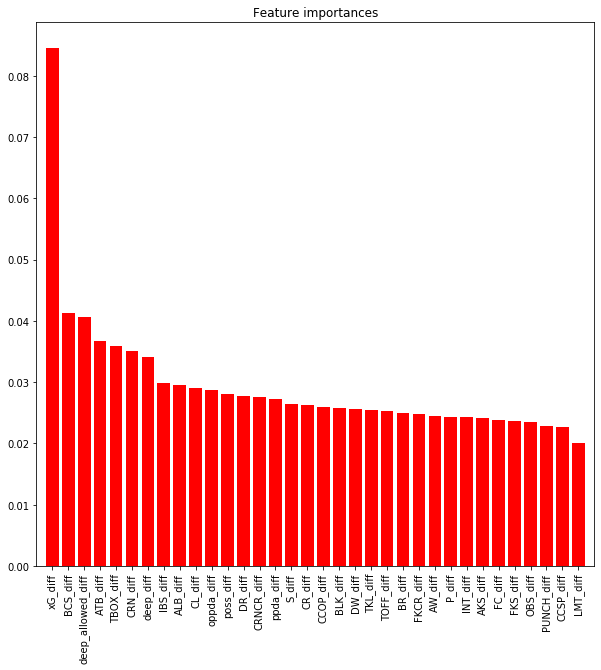

In [406]:
# Plot the feature importances of the forest
plt.figure(figsize=[10,10])
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances1[indices],
       color="r", #yerr=std1[indices], 
        align="center")
plt.xticks(range(X.shape[1]), col_list1[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [859]:
df_scaled3.head()

,Team,ppda_coef,deep,CR,P,DR,IBS,OBS,TBOX,FKCR,...,TKL,FC,AW,BR,DW,AKS,CL,PUNCH,LMT,poss
0,Bayern Munich,-0.898850,2.973806,1.611378,2.370940,2.120765,3.188202,0.987291,3.397046,0.739975,...,-2.081226,-1.795271,-0.716088,1.360479,-0.948188,0.407311,-3.083852,-1.680898,-0.596272,2.474804
1,Borussia Dortmund,1.390868,0.807589,-1.716195,1.854117,2.366656,0.630185,-0.790167,0.960062,0.388823,...,-1.469764,-2.115407,-1.202503,-0.403610,-0.713429,-1.157638,-0.662533,0.096810,-0.596272,1.379674
2,RasenBallsport Leipzig,-0.117029,0.509248,-0.068055,-0.233706,0.317571,1.470131,-0.663206,0.857572,0.827763,...,1.420784,0.653768,1.188352,1.945090,1.814138,1.581023,-0.321502,-1.147586,0.708380,-0.100780
3,Bayer Leverkusen,-0.271538,1.067016,0.203158,1.991632,0.710995,1.412862,0.701628,1.227675,-0.664633,...,0.401681,-0.866877,-0.386314,2.796366,0.084750,1.189786,-0.543172,-0.614273,-1.248599,1.562196
4,Borussia M.Gladbach,2.184874,0.405477,-0.600050,0.882059,-0.272566,0.343840,0.066822,0.174306,-0.576845,...,-1.414177,-1.475135,-1.433344,-1.101041,-2.419341,-1.157638,-1.003564,-1.503127,0.056054,0.467065


In [861]:
cos_sim1 = cosine_similarity(df_scaled2)

In [862]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_stats_poss3.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations2(team, cosine_sim = cos_sim1):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in all_indexes:
        recommended_teams.append(list(df_stats_poss3.index)[i])
    
    if recommended_teams[0] in epl_array:
        for i in recommended_teams:
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
            
        print(f"France: {fr_teams[0]}")
        print(f"Italy: {it_teams[0]}")
        print(f"Spain: {sp_teams[0]}" )
        print(f"Germany: {ge_teams[0]}")
    
    elif recommended_teams[0] in ligue_1_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(f"England: {en_teams[0]}")
        print(f"Italy: {it_teams[0]}")
        print(f"Spain: {sp_teams[0]}" )
        print(f"Germany: {ge_teams[0]}")
    
    elif recommended_teams[0] in serie_a_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(f"England: {en_teams[0]}")
        print(f"France: {fr_teams[0]}")
        print(f"Spain: {sp_teams[0]}" )
        print(f"Germany: {ge_teams[0]}")
    
    elif recommended_teams[0] in la_liga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        print(f"England: {en_teams[0]}")
        print(f"France: {fr_teams[0]}")
        print(f"Italy: {it_teams[0]}" )
        print(f"Germany: {ge_teams[0]}")
        
    elif recommended_teams[0] in bundesliga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
        print(f"England: {en_teams[0]}")
        print(f"France: {fr_teams[0]}")
        print(f"Italy: {it_teams[0]}" )
        print(f"Spain: {sp_teams[0]}")
    
    else:
        print('not applicable')
    
    return 


In [863]:
recommendations2('Bayern Munich')

England: Manchester City
France: Paris Saint Germain
Italy: Atalanta
Spain: Real Madrid


In [926]:
cos_sim1 = cosine_similarity(df_scaled2)

In [927]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_stats_poss3.index)
#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
def recommendations3(team, cosine_sim = cos_sim1):
    
    epl_array = (df_leagues['team'][df_leagues['league'] == 'EPL']).tolist()
    ligue_1_array = (df_leagues['team'][df_leagues['league'] == 'Ligue_1']).tolist()
    serie_a_array = (df_leagues['team'][df_leagues['league'] == 'Serie_A']).tolist()
    la_liga_array = (df_leagues['team'][df_leagues['league'] == 'La_liga']).tolist()
    bundesliga_array = (df_leagues['team'][df_leagues['league'] == 'Bundesliga']).tolist()
    
    en_teams = []
    fr_teams = []
    it_teams = []
    sp_teams = []
    ge_teams = []
    to_play = []
    
    # initializing the empty list of recommended movies
    recommended_teams = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == team].index[0]
    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    # getting the indexes of the 10 most similar movies
    all_indexes = list(score_series.index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in all_indexes:
        recommended_teams.append(list(df_stats_poss3.index)[i])
    
    if recommended_teams[0] in epl_array:
        for i in recommended_teams:
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        to_play.append(fr_teams[0])
        to_play.append(it_teams[0])
        to_play.append(sp_teams[0])
        to_play.append(ge_teams[0])
        
    
    elif recommended_teams[0] in ligue_1_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        to_play.append(en_teams[0])
        to_play.append(it_teams[0])
        to_play.append(sp_teams[0])
        to_play.append(ge_teams[0])
    
    elif recommended_teams[0] in serie_a_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        to_play.append(en_teams[0])
        to_play.append(fr_teams[0])
        to_play.append(sp_teams[0])
        to_play.append(ge_teams[0])
    
    elif recommended_teams[0] in la_liga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
            if i in bundesliga_array:
                ge_teams.append(i)
        to_play.append(en_teams[0])
        to_play.append(fr_teams[0])
        to_play.append(it_teams[0])
        to_play.append(ge_teams[0])
        
    elif recommended_teams[0] in bundesliga_array:
        for i in recommended_teams:
            if i in epl_array:
                en_teams.append(i)
            if i in serie_a_array:
                it_teams.append(i)
            if i in la_liga_array:
                sp_teams.append(i)
            if i in ligue_1_array:
                fr_teams.append(i)
        to_play.append(en_teams[0])
        to_play.append(fr_teams[0])
        to_play.append(it_teams[0])
        to_play.append(sp_teams[0])
    
    else:
        print('not applicable')
    
    return to_play


In [928]:
recommendations3('Schalke 04')

['Everton', 'Nantes', 'Torino', 'Atletico Madrid']

In [929]:
def simulate_matches2(team, team2, n_matches=50):
    match_results = []
    for i in range(n_matches):
        match_results.append(match3(df_merged2, team, team2, lr))
    team1_proba = match_results.count(team)/len(match_results)*100
    team2_proba = match_results.count(team2)/len(match_results)*100
    
    print(team, str(round(team1_proba, 2)) + '%')
    print(team2, str(round(team2_proba,2)) + '%')
    print('-------------------------')
    print()
    
    if team1_proba > team2_proba:
        overall_winner = team
    elif team2_proba > team1_proba:
        overall_winner = team2
    else:
        overall_winner = 'Tie'
    
    return 
#             {'team1': team,
#             'team2': team2,
#             'team1_proba': team1_proba, 
#             'team2_proba': team2_proba, 
#             'overall_winner': overall_winner,
#             }

In [930]:
simulate_matches2('Schalke 04', 'Nantes')

Schalke 04 34.0%
Nantes 30.0%
-------------------------



In [931]:
def rec_sim(team):
    teams_to_play = recommendations3(team)
    for team2 in teams_to_play:
        matchup = simulate_matches2(team, team2)
    return matchup

In [937]:
rec_sim('Arsenal')

Arsenal 8.0%
Paris Saint Germain 92.0%
-------------------------

Arsenal 72.0%
Empoli 26.0%
-------------------------

Arsenal 32.0%
Barcelona 62.0%
-------------------------

Arsenal 28.0%
Borussia Dortmund 70.0%
-------------------------



In [933]:
pip install streamlit

     |████████████████████████████████| 7.0MB 1.3MB/s eta 0:00:01     |█████████████▎                  | 2.9MB 2.2MB/s eta 0:00:02     |██████████████▍                 | 3.1MB 2.2MB/s eta 0:00:02     |█████████████████████████████   | 6.3MB 2.2MB/s eta 0:00:01
     |████████████████████████████████| 522kB 8.1MB/s eta 0:00:01
     |████████████████████████████████| 5.9MB 424kB/s eta 0:00:01     |██████▍                         | 1.2MB 4.9MB/s eta 0:00:01     |████████▋                       | 1.6MB 4.9MB/s eta 0:00:01     |███████████████▊                | 2.9MB 424kB/s eta 0:00:08
     |████████████████████████████████| 4.1MB 375kB/s eta 0:00:01     |████████████████████████████████| 4.1MB 375kB/s 
     |████████████████████████████████| 133kB 533kB/s eta 0:00:01
     |████████████████████████████████| 102kB 2.0MB/s ta 0:00:01
     |████████████████████████████████| 716kB 3.8MB/s eta 0:00:01
     |████████████████████████████████| 112kB 1.7MB/s eta 0:00:01
     |███████████████████████

  Created wheel for tornado: filename=tornado-5.1.1-cp37-cp37m-macosx_10_9_x86_64.whl size=451998 sha256=b92ed3783e34d0b76706533574c9816eab80b3fdb61135c9caa7fec5a6c8da42
  Stored in directory: /Users/andrewtriola/Library/Caches/pip/wheels/6d/e1/ce/f4ee2fa420cc6b940123c64992b81047816d0a9fad6b879325
  Created wheel for validators: filename=validators-0.14.2-cp37-none-any.whl size=17249 sha256=4709fa2a2e35a15295a8a37883ee0b77180c4ff03a5d3b22bac5aecc631bf9fb
  Stored in directory: /Users/andrewtriola/Library/Caches/pip/wheels/46/e4/bb/0c8fc33769e30e0049771579b608e6a0d4a00db8a1a29e7ce7
  Created wheel for watchdog: filename=watchdog-0.10.2-cp37-cp37m-macosx_10_9_x86_64.whl size=78283 sha256=bc9c7b863292f607b089f7e4e78958d6d7f98e94e159852ccfa94c91c666c6c4
  Stored in directory: /Users/andrewtriola/Library/Caches/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13450 sha256=32319df69dc29f2a20241455b

    Uninstalling tornado-6.0.3:
      Successfully uninstalled tornado-6.0.3
Note: you may need to restart the kernel to use updated packages.


In [935]:
df_merged2.to_csv(r'/Users/andrewtriola/Documents/flatiron/final_project/final_project_repo/df_merged2.csv')

In [936]:
df_merged2.head()

,Home,xG,xG.1,Away,home_goals,away_goals,ppda_coef_x,deep_x,CR_x,P_x,...,FC_diff,AW_diff,BR_diff,DW_diff,AKS_diff,CL_diff,PUNCH_diff,LMT_diff,poss_diff,score
0,Manchester United,1.6,1.1,Leicester,2,1,-0.409202,0.963928,-0.539109,0.650128,...,1.174393,-0.892557,-0.945202,-1.848415,-0.350054,-1.235788,-0.477174,-1.167321,0.507005,1
1,Newcastle United,0.3,1.4,Leicester,0,2,0.853560,-0.602876,0.142217,-1.089636,...,1.031175,-0.103271,0.036707,-1.288289,1.225191,1.334956,0.000000,-0.583660,-1.602135,-2
2,Huddersfield,1.7,3.0,Leicester,1,4,0.197249,-1.125143,0.683545,-0.439448,...,0.988209,0.309813,0.321185,-0.700157,0.175027,-2.196956,0.954348,-1.750981,-0.750367,-3
3,Fulham,1.7,1.8,Leicester,1,1,1.492186,-0.684117,-0.791106,0.188290,...,1.031175,-0.501602,0.229418,-1.519341,1.575245,0.190708,2.226813,-2.334641,-0.324483,0
4,Watford,0.8,1.0,Leicester,2,1,0.083612,0.522902,-1.173769,-0.523710,...,1.174393,-0.331943,0.119297,-1.169262,4.025627,0.083912,-0.795290,1.750981,-0.689527,1
